In [12]:
# Install required packages
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('Overview_Original_df_25_items2024-12-23.xlsx')

In [5]:
display(df)

,Unnamed: 0,Type nr,Instance nr,Batch nr,Method,Beta,Error Prediction,Error Objective,Error Constraint,Contribution Target 0 Val\n1,...,Contribution Target 25 Wgt\n16,Contribution Target 25 Wgt\n17,Contribution Target 25 Wgt\n18,Contribution Target 25 Wgt\n19,Contribution Target 25 Wgt\n20,Contribution Target 25 Wgt\n21,Contribution Target 25 Wgt\n22,Contribution Target 25 Wgt\n23,Contribution Target 25 Wgt\n24,Contribution Target 25 Wgt\n25
0,0,Type 0,Instance 0,Batch 0,Standard Linear Regression,[[ 7.27711756e-01 9.16822078e-01 9.30962395e...,641.426558,0.324159,4.954856,0.083221,...,-0.039456,0.047251,-0.107175,-0.032991,-0.058021,-0.042201,0.002343,-0.022526,-0.021313,-1.221870
1,1,Type 0,Instance 0,Batch 0,Decision Tree Regression,[[ 7.27711756e-01 9.16822078e-01 9.30962395e...,546.482868,7.836525,21.637352,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447098
2,2,Type 0,Instance 0,Batch 0,Regularized Linear Regression,[[ 0.70447027 0.97105556 0.89372081 ... ...,705.536172,0.096180,0.009867,0.080563,...,-0.011708,0.045005,-0.085047,-0.010506,-0.040612,-0.012731,-0.009108,-0.000831,-0.017112,-1.091296
3,3,Type 0,Instance 0,Batch 1,Standard Linear Regression,[[ 0.76329547 1.02601879 0.99274442 ... ...,645.520956,0.337653,5.051188,0.087290,...,0.008684,-0.007687,-0.057737,-0.008522,0.030135,-0.114816,0.008336,-0.033735,0.040701,-1.151329
4,4,Type 0,Instance 0,Batch 1,Decision Tree Regression,[[ 0.76329547 1.02601879 0.99274442 ... ...,549.845438,8.105729,22.334798,0.044649,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.493076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,Type 3,Instance 9,Batch 8,Decision Tree Regression,[[ 0.56692258 0.61002294 0.16783219 ... ...,857.492473,15.820764,41.073233,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000131,0.000000,0.000000,0.752132
1196,1196,Type 3,Instance 9,Batch 8,Regularized Linear Regression,[[ 6.13048728e-01 5.47010407e-01 -5.21054262e...,1177.523599,0.295839,0.031152,0.042740,...,-0.021023,-0.026089,0.012368,0.000362,-0.031884,0.016507,0.031982,-0.010359,0.006051,-0.486177
1197,1197,Type 3,Instance 9,Batch 9,Standard Linear Regression,[[ 0.48870906 0.40130994 0.31479861 ... ...,1066.515198,0.824887,9.328169,0.034071,...,0.016593,0.037616,0.005553,-0.031840,-0.003191,0.023267,0.018372,0.022494,0.025847,-0.468137
1198,1198,Type 3,Instance 9,Batch 9,Decision Tree Regression,[[ 0.48870906 0.40130994 0.31479861 ... ...,890.771028,15.669282,40.601983,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.822807


In [35]:
type_list = ['Type 0', 'Type 1', 'Type 2', 'Type 3']
df = df.replace('Standard Linear Regression', 'LR')
df = df.replace('Decision Tree Regression', 'DTR')
df = df.replace('Regularized Linear Regression', 'CLEMO')
df['Coherence error'] = df['Error Objective'] + df['Error Constraint']

In [122]:
sns.reset_defaults()
plt.rcParams.update({'font.size': 12})

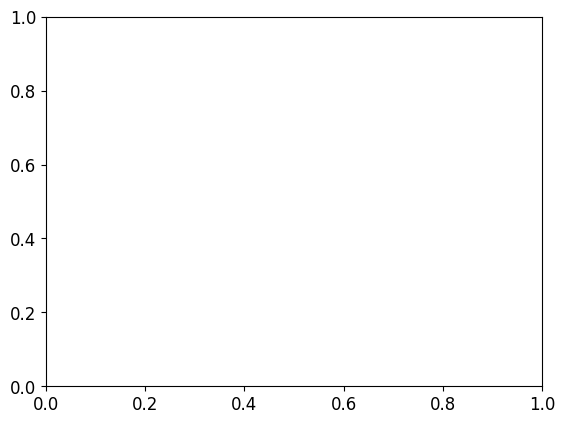

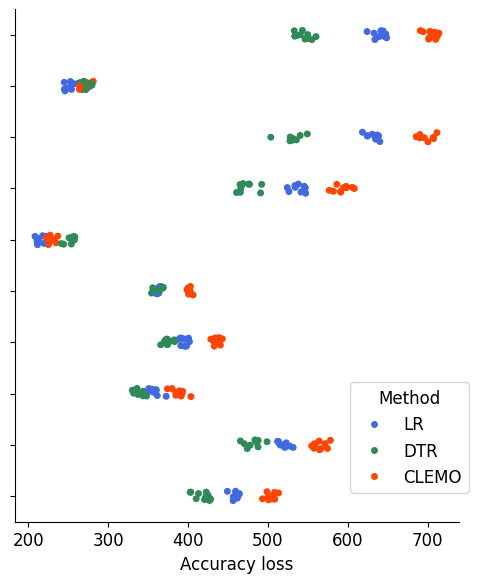

<Figure size 600x800 with 0 Axes>

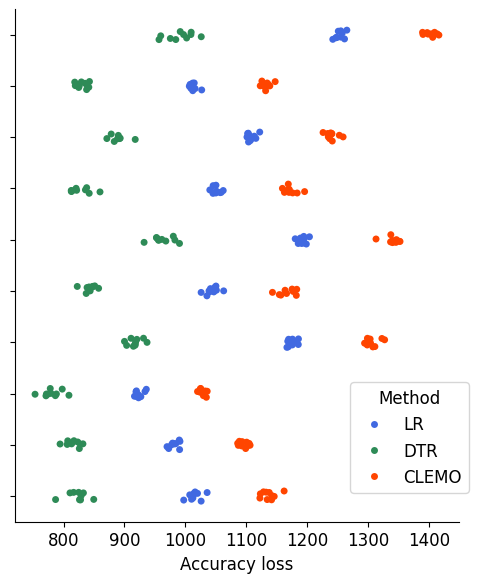

<Figure size 600x800 with 0 Axes>

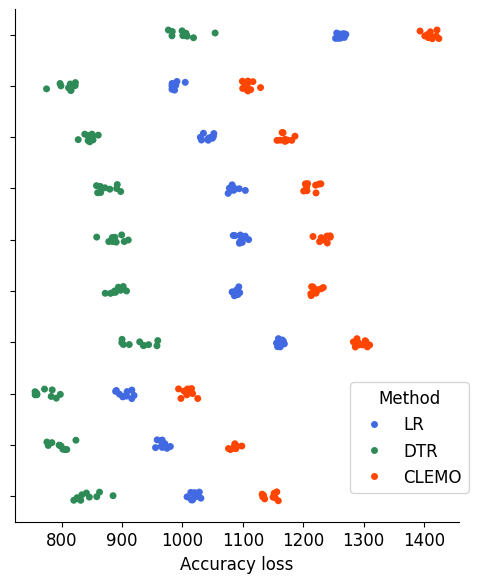

<Figure size 600x800 with 0 Axes>

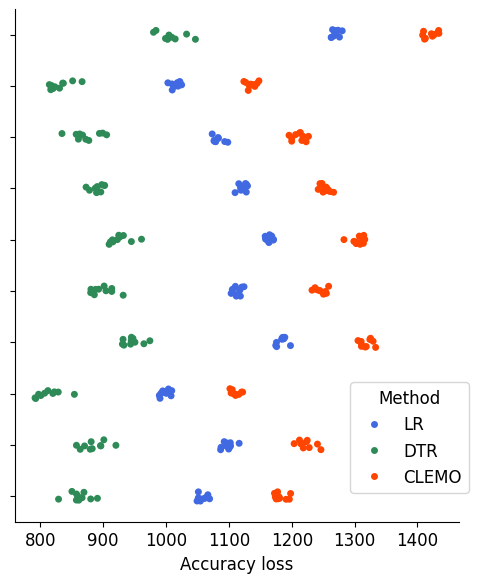

<Figure size 600x800 with 0 Axes>

In [130]:
my_pal = {"LR": "royalblue", "DTR": "seagreen", "CLEMO":"orangered"}
fig, ax = plt.subplots()
for type in type_list:
    ax = sns.catplot(data=df[df['Type nr'] == type], x="Error Prediction", y="Instance nr", hue="Method", palette=my_pal, legend_out=False, height=6, aspect=1)
    sns.move_legend(ax, "lower right", bbox_to_anchor=(1, .15))
    plt.yticks(ticks= ['Instance '+ str(i) for i in range(10)],labels = [])
    plt.ylabel('')
    plt.xlabel('Accuracy loss')
    plt.figure(figsize=(6, 8))
    plt.show()

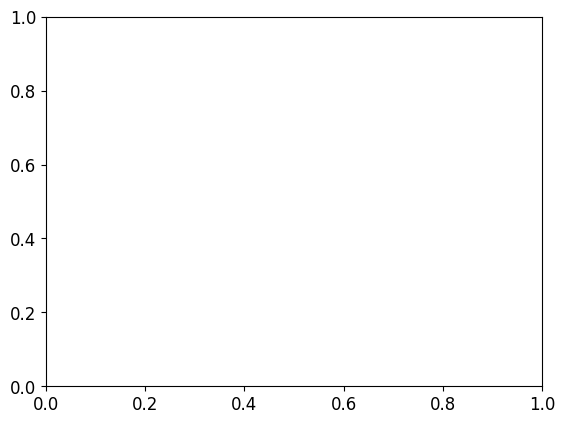

<Figure size 600x800 with 0 Axes>

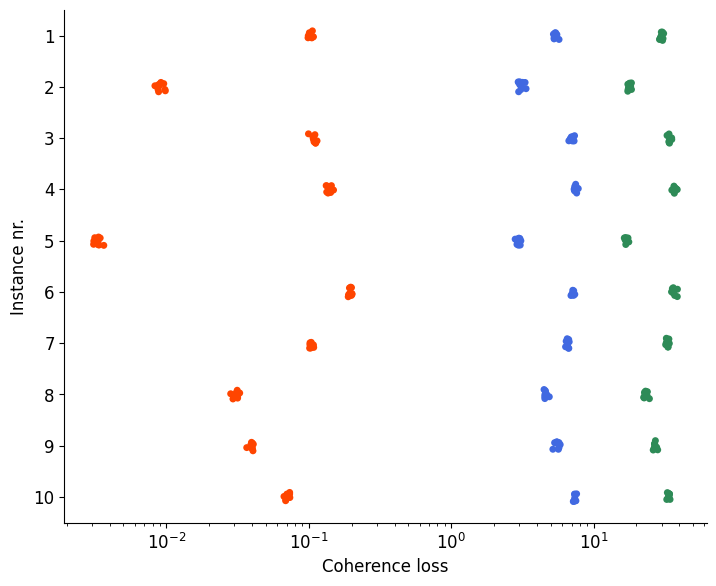

<Figure size 600x800 with 0 Axes>

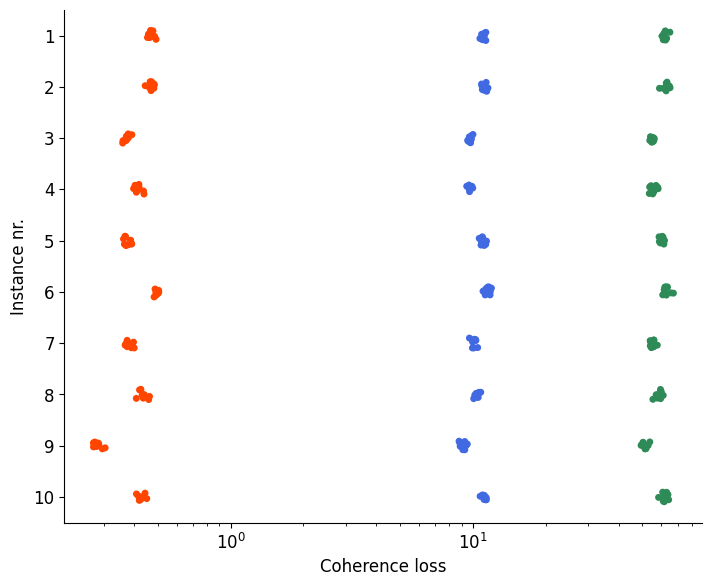

<Figure size 600x800 with 0 Axes>

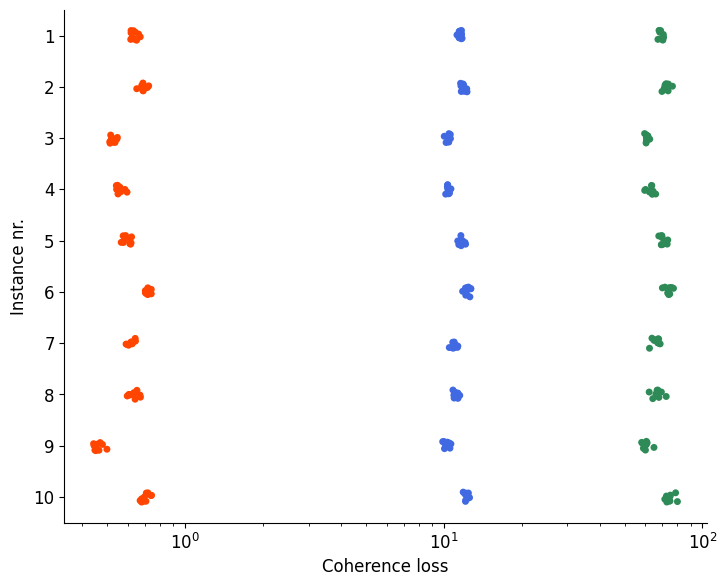

<Figure size 600x800 with 0 Axes>

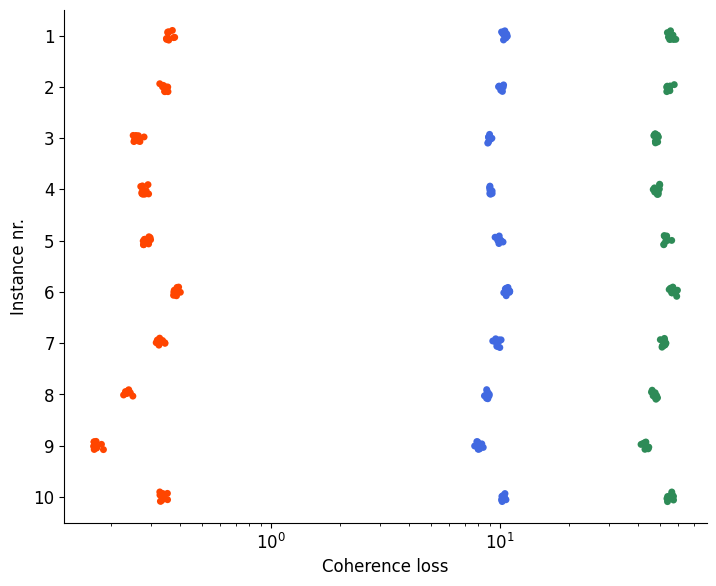

In [128]:
fig, ax = plt.subplots()
for type in type_list:
    plt.figure(figsize=(6, 8))
    sns.catplot(data=df[(df['Type nr'] == type)], x="Coherence error", y="Instance nr", hue="Method", palette=my_pal, legend=False, height = 6, aspect=1.33)
    # sns.boxplot(data=df[(df['Type nr'] == type) & (df['Method'] != 'DTR')], x="Coherence error", y="Instance nr", hue="Method", palette=my_pal)
    # ax = sns.boxplot(..., labels=["Metric", "Length"])labels=['LR', 'DTR', 'CLEMO'])
    plt.yticks(ticks= ['Instance '+ str(i) for i in range(10)],labels = [str(i) for i in range(1,11)])
    plt.xlabel('Coherence loss')
    plt.ylabel('Instance nr.')
    plt.xscale('log')
    plt.show()